    Intercept  \
0         1.0   
1         1.0   
2         1.0   
3         1.0   
4         1.0   
..        ...   
95        1.0   
96        1.0   
97        1.0   
98        1.0   
99        1.0   

    bs(df['X'], degree=3, knots=[3, 6, 9], include_intercept=True)[0]  \
0                                            1.000000                   
1                                            0.902353                   
2                                            0.811278                   
3                                            0.726548                   
4                                            0.647933                   
..                                                ...                   
95                                           0.000000                   
96                                           0.000000                   
97                                           0.000000                   
98                                           0.000000            

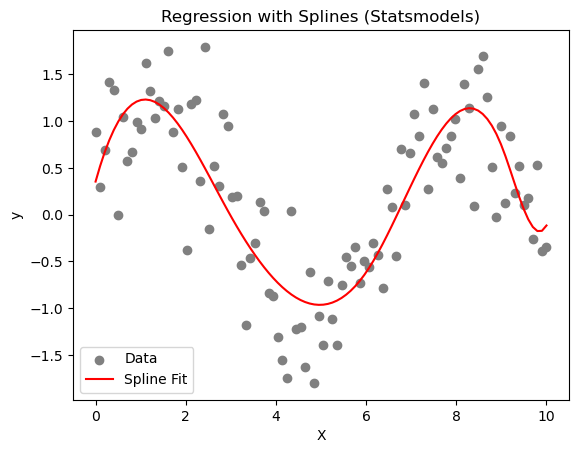

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix

np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(scale=0.5, size=X.shape)

#Convert X to a DataFrame
df = pd.DataFrame({"X": X, "y": y})

#Create spline basis with 3 degrees of freedom
spline = dmatrix("bs(df['X'], degree=3, knots=[3, 6, 9], include_intercept=True)", 
                 {"df": df}, return_type='dataframe')

print(spline)

model = sm.OLS(df['y'], spline).fit()

print(model.summary())

y_pred = model.predict(spline)

#Plot the original data and the spline fit
plt.scatter(X, y, label="Data", color="gray")
plt.plot(X, y_pred, label="Spline Fit", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression with Splines (Statsmodels)")
plt.legend()
plt.show()